In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 9.0 MB/s 
     |████████████████████████████████| 596 kB 36.8 MB/s 
     |████████████████████████████████| 67 kB 3.8 MB/s 
     |████████████████████████████████| 895 kB 38.8 MB/s 
     |████████████████████████████████| 3.3 MB 35.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
emotes = ['CorgiDerp', 'Dance', 'SMOrc', 'haHAA', 'forsenE', 'chipsaKEK', 'eeveeDance', 'Kanyewheat', 'FeelsBadMan', 'chipsaYil', 'PepePls', 'TriDance', 'forsenBoys', 'DuckerZ', 'lucaKuk', 'CurseLit', 'cmonBruh', 'NotLikeThis', 'empiSwag', 'R)', 'solemChonker', 'papajOk', 'SourPls', 'ZULUL', 'HeyGuys', 'catJAM', 'pepeDS', 'suwieOwO', 'PalDouble', 'pepeD', 'POGGERS', 'ResidentSleeper', 'TRUEING', 'FireSpeed', 'pokiW', 'forsenPls', ':)', ':(', 'KEKW', 'DansGame', 'SeemsGood', 'B)', 'bleedPurple', 'VoHiYo', 'purpleCx', 'forsen5G', 'blobDance', 'LUL', 'kiandoAYAYA', 'LUCA', 'forsenSven', 'sillyTiz', 'EZ', ':D', 'Clap', 'monkaS', 'KappaPride', 'nebelHERZ', 'FeelsGoodMan', 'BloodTrail', 'WutFace', 'ppOverheat', 'yyjSmile', 'pepeJAM', 'Trikose', 'sanaSnuggle', 'shiftBeter', 'dnyPls', 'TriHard', '4Head', 'iamsocal', 'Kappa', 'papaL', 'BibleThump', 'maskof3Guk', 'Kreygasm', 'TriKool', 'RainbowPls', '4Weirding', 'AYAYA', 'moon2E', 'pcrowDoodle', 'gachiBASS', 'flushE', 'gaminaKappa', 'gachiHYPER', 'OMEGALUL', 'D:', 'LuL', 'xqcL', 'BabyRage', '<3', 'ungryPaimon', 'PogChamp', 'NaM', 'Primi', 'KEKWait', 'sumParrot']

print(len(emotes))

98


In [ ]:
ls /content/drive/MyDrive/twitch_roberta/test-clm/checkpoint-480000/

config.json   pytorch_model.bin  scheduler.pt        training_args.bin
optimizer.pt  rng_state.pth      trainer_state.json


In [ ]:
!rm -rf last_checkpoint
!cp -r /content/drive/MyDrive/twitch_roberta/test-clm/checkpoint-480000/ last_checkpoint

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoConfig
import os

model_checkpoint = "distilroberta-base"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

saved_model_checkpoint = model_checkpoint#'last_checkpoint/'

config = AutoConfig.from_pretrained(saved_model_checkpoint)
model = AutoModelForMaskedLM.from_pretrained(saved_model_checkpoint)

encoded_input = tokenizer('hello', return_tensors='pt')
model_output = model(**encoded_input)
print(model_output)

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

MaskedLMOutput(loss=None, logits=tensor([[[35.7534, -4.6153, 21.7730,  ...,  1.4926,  4.4489, 13.5250],
         [ 1.7070, -5.4879, 13.5771,  ..., -5.9484, -4.8651,  1.3504],
         [14.7489, -6.5134, 23.1316,  ..., -3.1752, -0.9757,  4.5474]]],
       grad_fn=<AddBackward0>), hidden_states=None, attentions=None)


In [ ]:
import torch 

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

def get_twitch_emote_encoding(emote, model, tokenizer):
    encoded_input = tokenizer(emote, return_tensors='pt')
    return mean_pooling(model(**encoded_input), encoded_input['attention_mask']).detach().numpy()

get_twitch_emote_encoding('Kappa', model=model, tokenizer=tokenizer)

array([[12.54557  , -5.5453796, 16.766644 , ..., -3.104364 , -1.4523101,
         4.663648 ]], dtype=float32)

In [ ]:
representations = [get_twitch_emote_encoding(emote, model=model, tokenizer=tokenizer) for emote in emotes]

In [ ]:
from sklearn.decomposition import PCA

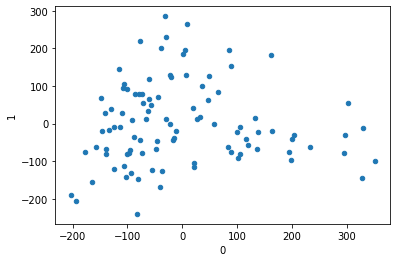

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

plot_frame = pd.DataFrame(PCA(random_state=42).fit_transform(np.vstack(representations))[:,:2], index=emotes)
plot_frame.plot(x=0, y=1, kind='scatter')

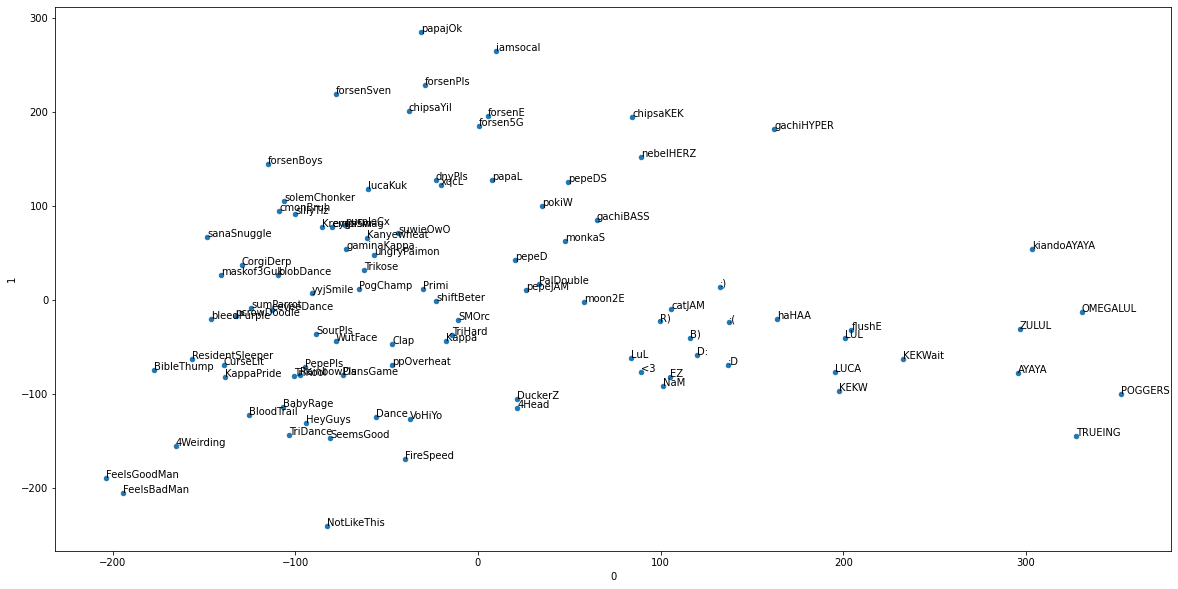

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

fig, ax = plt.subplots()
plot_frame.plot(0, 1, kind='scatter', ax=ax)

for k, v in plot_frame.iterrows():
    ax.annotate(k, v)